In [1]:
from myutils.plotters import StandardPlotter
from construct_variables import (extract_values,
                                 extract_atoms,
                                 uppercase_letters)
import matplotlib.pyplot as plt
import numpy as np


experiments = [2.00324, 2.00263, 2.00218]

In [3]:
vals = extract_values('../', exclude=['../9_0-Rhop_FarRad1'])
#confs = extract_atoms('../')

0 ../1_0-AlkylShift
1 ../2_0-Hshift
2 ../3_0-Rhop
3 ../3_1-Rhop-LeftPhenyl
4 ../3_2-Rhop-RightPhenyl
5 ../4_0-inchain
6 ../4_1-inchainLarger
7 ../5_0-primary_in_ring
8 ../6_0-primary_in_triple
9 ../7_0-triple_broken
10 ../8_0-Hshift_FarRad1
11 ../8_1-Hshift_FarRad2
12 ../9_1-Rhop_FarRad2


In [16]:
vals[:, :, 0].flatten()

array([2.002902 , 2.0027826, 2.0029046, 2.0027921, 2.0028359, 2.0028217,
       2.0028587, 2.0028401, 2.0028608, 2.0028423, 2.0028944, 2.0028697,
       2.0028855, 2.0028413, 2.0028726, 2.0028722, 2.0028408, 2.0028327,
       2.0029394, 2.0028699, 2.0028335, 2.0028328, 2.0028977, 2.0028729,
       2.0028397, 2.002821 , 2.0028996, 2.0028614, 2.0031548, 2.0029421,
       2.0031225, 2.0029464, 2.0069623, 2.006973 , 2.0069426, 2.0069655,
       2.0126297, 2.012587 , 2.0270687, 2.0269326, 2.0028834, 2.0028003,
       2.0029103, 2.0028127, 2.0030016, 2.00272  , 2.0030251, 2.0027441,
       2.0030102, 2.0027176, 2.0030353, 2.002743 ])

In [19]:
max(vals[:, :, 0].flatten())

2.0270687

In [11]:
max(vals[:, :, ].T.flatten())

2.0024236

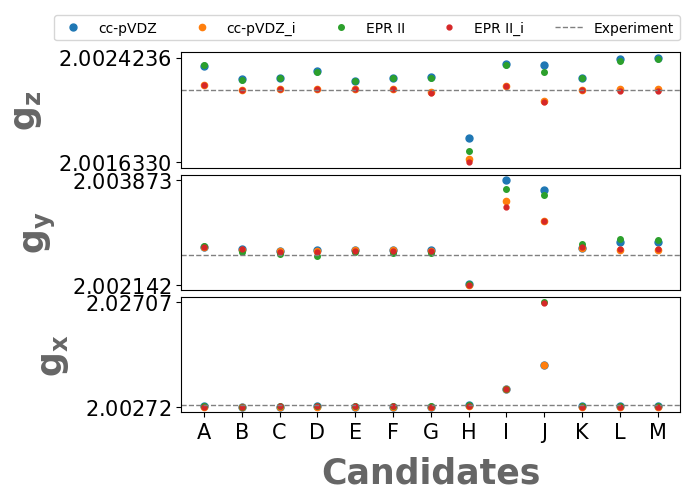

In [6]:
fig, ax = plt.subplots(3,1)
sp = StandardPlotter(fig=fig, ax=ax)


yticks = [[2.0017, 2.0020, 2.0023],
          [2.0024, 2.0030, 2.0036],
          [2.0035, 2.0050, 2.0065]]
xyz_lab = ['x', 'y', 'z']
for i in [0, 1, 2]:
    sp.plot_data(vals[:, :, 2 - i].T, ax=i,
                 pstyle='o',
                 data_label=['cc-pVDZ',
                             'cc-pVDZ_i',
                             'EPR II',
                             'EPR II_i'],
                 markersize=[5, 4.5, 4, 3.5])
    # Add experimental Values
    xlims = sp.ax[i].get_xlim()
    sp.plot_data(xlims, [experiments[2 - i]]*2, ax=i,
                 pstyle='--', color_plot='gray',
                 lw =1, data_label='Experiment')
    sp.axis_setter(ax=i, ylabel=r'g$_{\rm{\bf ' + xyz_lab[2 - i] +'}}$', xlim=xlims,
                   xticks=[],
                   yticks=[min(vals[:, :, 2 - i].T.flatten()), max(vals[:, :, 2 - i].T.flatten())])
                   #yticks=yticks[i])
                   #ylim=np.array([-0.00045, 0.00045]) + experiments[2 - i])

# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)+1),
                    uppercase_letters[:len(vals)])
sp.ax[2].set_xlabel('Candidates')
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.21, 0.16], [0.99, 0.91]],
                      spaces=[0.015, 0.015])
handles, labels = sp.ax[0].get_legend_handles_labels()
sp.ax[0].legend(handles, labels, bbox_to_anchor=(0., 0.9, 1., .102),
                mode="expand", ncols=5,
                bbox_transform=sp.fig.transFigure)


In [22]:
sp.fig.savefig('AllMethods-AllCandidates.png', dpi=300)

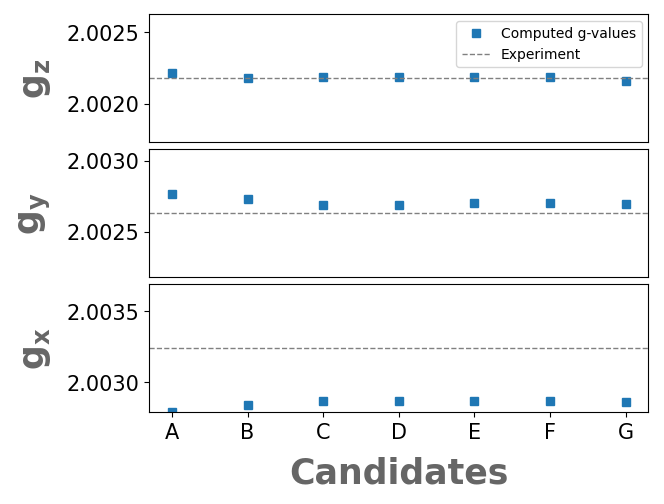

In [23]:
fig, ax = plt.subplots(3,1)
sp = StandardPlotter(fig=fig, ax=ax)

for i in [0, 1, 2]:
    sp.plot_data(vals[:-2, 3, 2 - i].T, ax=i,
                 pstyle='s',
                 data_label='Computed g-values')
    # Add experimental Values
    xlims = sp.ax[i].get_xlim()
    sp.plot_data(xlims, [experiments[2 - i]]*2, ax=i,
                 pstyle='--', color_plot='gray',
                 lw =1, data_label='Experiment')
    sp.axis_setter(ax=i, ylabel=r'g$_{\rm{\bf ' + xyz_lab[2 - i] +'}}$', xlim=xlims,
                   xticks=[],
                   ylim=np.array([-0.00045, 0.00045]) + experiments[2 - i],
                   sci_not=False)

# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)-1),
                    uppercase_letters[:len(vals) - 2])
sp.ax[2].set_xlabel('Candidates')
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.21, 0.16], [0.99, 0.99]],
                      spaces=[0.015, 0.015])
handles, labels = sp.ax[0].get_legend_handles_labels()
sp.ax[0].legend()

# sp.ax[0].legend(handles, labels, bbox_to_anchor=(0., 0.9, 1., .102),
#                 mode="expand", ncols=5,
#                 bbox_transform=sp.fig.transFigure)


In [24]:
sp.fig.savefig('only_one_method.png', dpi=300)

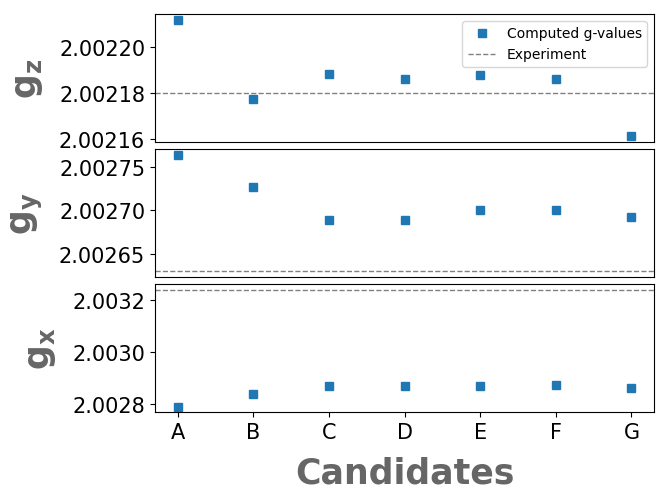

In [27]:
fig, ax = plt.subplots(3,1)
sp = StandardPlotter(fig=fig, ax=ax)


for i in [0, 1, 2]:
    sp.plot_data(vals[:-2, 3, 2 - i].T, ax=i,
                 pstyle='s',
                 data_label='Computed g-values')
    # Add experimental Values
    xlims = sp.ax[i].get_xlim()
    sp.plot_data(xlims, [experiments[2 - i]]*2, ax=i,
                 pstyle='--', color_plot='gray',
                 lw =1, data_label='Experiment')
    sp.axis_setter(ax=i, ylabel=r'g$_{\rm{\bf ' + xyz_lab[2 - i] +'}}$', xlim=xlims,
                   xticks=[],
                   #ylim=np.array([-0.00045, 0.00045]) + experiments[2 - i],
                   sci_not=False)

# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)-1),
                    uppercase_letters[:len(vals) - 2])
sp.ax[2].set_xlabel('Candidates')
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.21, 0.16], [0.99, 0.99]],
                      spaces=[0.015, 0.015])
sp.ax[0].legend()


# sp.ax[0].legend(handles, labels, bbox_to_anchor=(0., 0.9, 1., .102),
#                 mode="expand", ncols=5,
#                 bbox_transform=sp.fig.transFigure)


In [28]:
sp.fig.savefig('only_one_method2.png', dpi=300)